In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
! pwd

/home/nbuser/Packaging


In [3]:
from fastai import *
from fastai.vision import *

from PIL import Image, ImageDraw, ImageFont, ImageColor
from random import randint

In [4]:
path = Path('/home/nbuser/Packaging')

In [5]:
! wget -c https://github.com/google/fonts/archive/master.zip

--2018-11-14 20:06:29--  https://github.com/google/fonts/archive/master.zip
Resolving github.com (github.com)... 140.82.118.3, 140.82.118.4
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/google/fonts/zip/master [following]
--2018-11-14 20:06:30--  https://codeload.github.com/google/fonts/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120, 192.30.253.121
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381825769 (364M) [application/zip]
Saving to: ‘master.zip’

master.zip          100%[===================>] 364.14M  35.8MB/s    in 11s     

2018-11-14 20:06:42 (32.5 MB/s) - ‘master.zip’ saved [381825769/381825769]



In [7]:
from shutil import unpack_archive
unpack_archive('master.zip', 'fonts/')

In [8]:
# get all fonts in one array:
import glob
fonts = [filename for filename in glob.iglob('fonts/**/*.ttf', recursive=True)]
len(fonts)

2689

In [12]:
def get_random_color():
    return 'rgb('+str(randint(0,255))+','+str(randint(0,255))+','+str(randint(0,255))+')'

def generate_rand_image(text):
    img = Image.new('RGBA', (250, 250), get_random_color())
    random_font = fonts[randint(0, len(fonts))]
    font = ImageFont.truetype(random_font, randint(100,150))
    d = ImageDraw.Draw(img)
    d.text((randint(0,50), randint(0,50)), text, font=font, fill=get_random_color())
    return img

def generate_images_for_class(path, class_name, n, csv_items):
    txt = class_name
    for i in range(0,n):
        try:
            img = generate_rand_image(txt)
        except:
            continue
            
        file_name = class_name + '_' + str(i) + '.png'
        img.save(str(path) + '/' + file_name)
        csv_items.append({'file_name': file_name, 'class_name': class_name})
    return csv_items

In [13]:
classes = ['125', '250', '500']

csv_items = []
for class_name in classes:
    csv_items = generate_images_for_class(path/'images', class_name, 1000, csv_items)

df = pd.DataFrame(csv_items, columns=['file_name', 'class_name'])
df.to_csv(path/'labels-fonts.csv', index=False)

In [14]:
df.head()

,file_name,class_name
0,125_0.png,125
1,125_1.png,125
2,125_3.png,125
3,125_4.png,125
4,125_5.png,125


In [20]:
data = ImageDataBunch.from_csv(path, "images", csv_labels='labels-fonts.csv', valid_pct=0.2,
        ds_tfms=get_transforms(do_flip=False), size=250).normalize(imagenet_stats)

data.classes

[125, 250, 500]

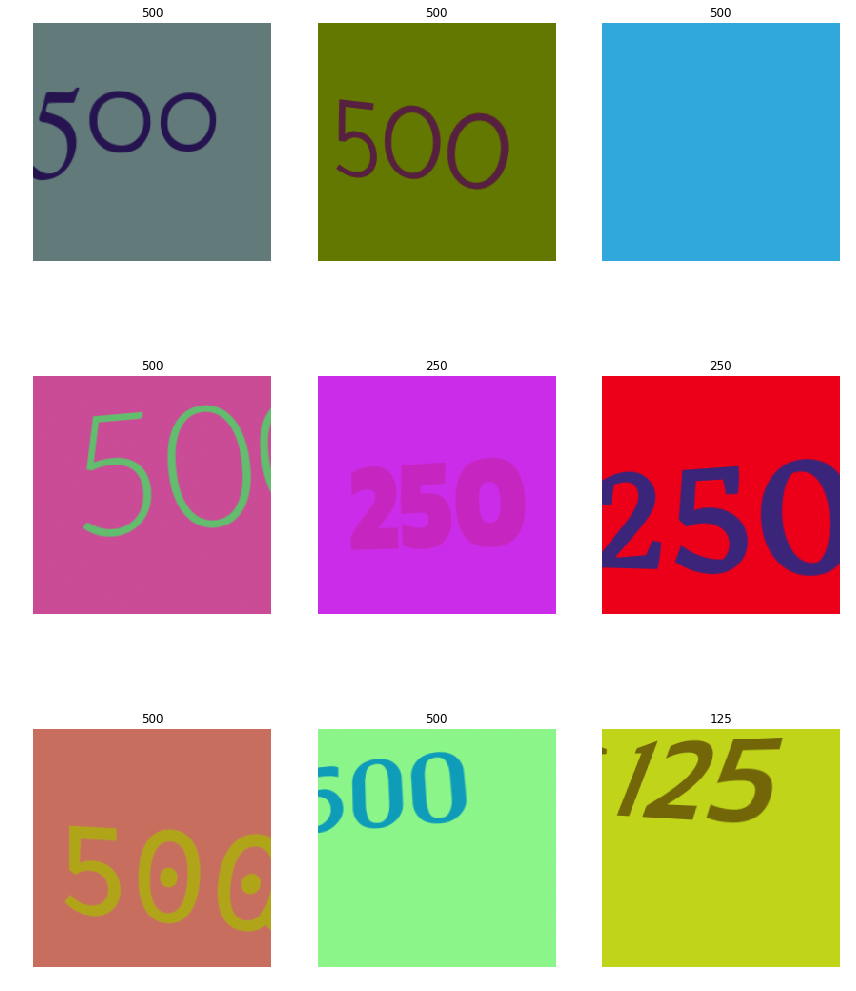

In [21]:
data.show_batch(3)